In [17]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as wb

In [21]:
#Loading portfolio data
tickers = ['MOREPENLAB.NS','RECLTD.NS','TALWALKARS.NS','FCONSUMER.NS']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source = 'yahoo', start = '2013-1-1')['Adj Close']
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1222 entries, 2013-01-01 to 2017-12-13
Data columns (total 4 columns):
MOREPENLAB.NS    1158 non-null float64
RECLTD.NS        1219 non-null float64
TALWALKARS.NS    1159 non-null float64
FCONSUMER.NS     1106 non-null float64
dtypes: float64(4)
memory usage: 47.7 KB


In [22]:
mydata.head()

,MOREPENLAB.NS,RECLTD.NS,TALWALKARS.NS,FCONSUMER.NS
Date,,,,
2013-01-01,3.80,76.191162,189.234085,9.90
2013-01-02,3.80,77.984978,189.424698,9.75
2013-01-03,3.70,80.706093,192.712830,9.95
2013-01-04,3.85,80.888504,189.329391,9.80
2013-01-07,3.90,78.729858,189.234085,9.95


In [23]:
mydata.tail()

,MOREPENLAB.NS,RECLTD.NS,TALWALKARS.NS,FCONSUMER.NS
Date,,,,
2017-12-07,27.750000,152.350006,295.549988,58.599998
2017-12-08,27.450001,153.000000,300.850006,68.050003
2017-12-11,25.650000,151.199997,303.549988,67.000000
2017-12-12,25.049999,147.000000,302.250000,65.300003
2017-12-13,24.950001,145.750000,302.700012,63.700001


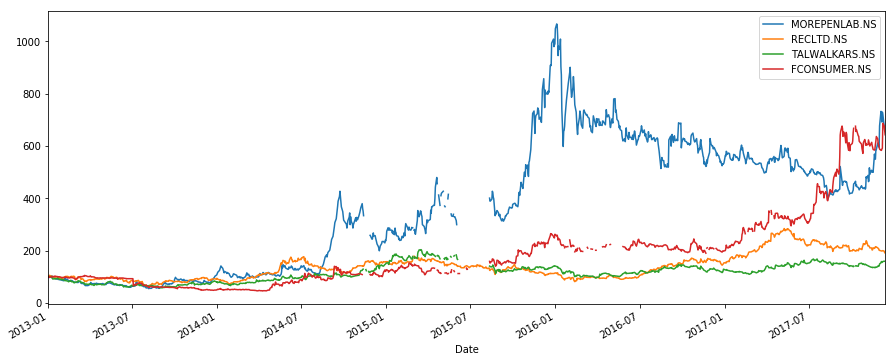

In [24]:
#Normalizing prices to 100 and plotting chart
(mydata/mydata.iloc[0]*100).plot(figsize = (15,6))
plt.show()

In [29]:
#Calculating simple return
returns = (mydata/mydata.shift(1)) - 1
returns.head()

,MOREPENLAB.NS,RECLTD.NS,TALWALKARS.NS,FCONSUMER.NS
Date,,,,
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,0.000000,0.023544,0.001007,-0.015152
2013-01-03,-0.026316,0.034893,0.017359,0.020513
2013-01-04,0.040541,0.002260,-0.017557,-0.015075
2013-01-07,0.012987,-0.026687,-0.000503,0.015306


In [30]:
annual_returns = returns.mean() * 250
print(annual_returns)

MOREPENLAB.NS    0.677674
RECLTD.NS        0.189577
TALWALKARS.NS    0.199944
FCONSUMER.NS     0.477832
dtype: float64


In [33]:
#Weights in the portfolio
weights = np.array([0.1963, 0.1147, 0.2381, 0.4510])

In [34]:
#Annual portfolio return 
print(str(round(np.dot(annual_returns, weights), 5) * 100) + "%")

41.788%
